In [1]:
#Import Library
import numpy as np
import imageio
import matplotlib.pyplot as plt
from google.colab import files
file = files.upload() #mengupload gambar

Saving pentol.jpg to pentol.jpg


In [ ]:
#Membaca Gambar
img = imageio.imread("pentol.jpg")

In [3]:
img_height = img.shape[0]
img_width = img.shape[1]
img_channel = img.shape[2]

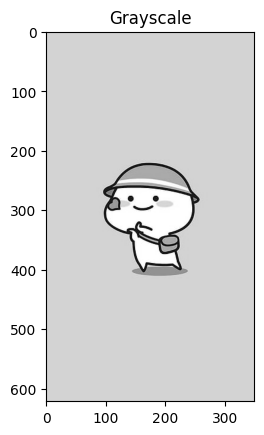

In [4]:
#Merubah gambar menjadi Grayscale
img_grayscale = np.zeros(img.shape, dtype=np.uint8)

for y in range(0, img_height):
    for x in range(0, img_width):
        red = img[y][x][0]
        green = img[y][x][1]
        blue = img[y][x][2]
        gray = (int(red) + int(green) + int(blue)) / 3
        img_grayscale[y][x] = (gray, gray, gray)
        
plt.imshow(img_grayscale)
plt.title("Grayscale")
plt.show() #menampilkan hasil grayscale

In [5]:
#Menampilkan Histogram Gambar Grayscale
#Membuat variabel untuk menyimpan data gambar
hg = np.zeros((256))

In [6]:
#Mengisi setiap nilai dalam array hg dengan 0
for x in range(0, 256):
    hg[x] = 0

In [7]:
#Menghitung nilai dari gambar
for y in range(0, img_height):
    for x in range(0, img_width):
        gray = img_grayscale[y][x][0]
        hg[gray] += 1

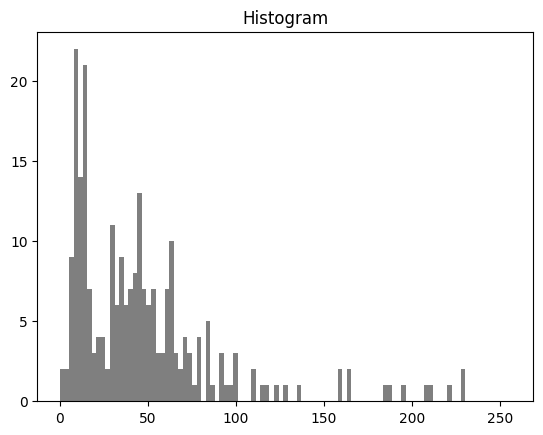

In [8]:
#Menampilkan Histogram
# plt.figure(figsize=(20, 6))
# plt.plot(hg, color="black", linewidth=2.0)
# plt.show()

bins = np.linspace(0, 256, 100)
plt.hist(hg, bins, color="black", alpha=0.5)
plt.title("Histogram")
plt.show() #menampilkan hasil histogram

In [9]:
#Menampilkan Histogram Gambar RGB
#Membuat variabel untuk menyimpan data gambar
hgr = np.zeros((256))
hgg = np.zeros((256))
hgb = np.zeros((256))
hgrgb = np.zeros((768))

In [10]:
#Mengisi setiap nilai dalam array hg dengan 0
for x in range(0, 256):
    hgr[x] = 0
    hgg[x] = 0
    hgb[x] = 0
    
for x in range(0, 768):
    hgrgb[x] = 0

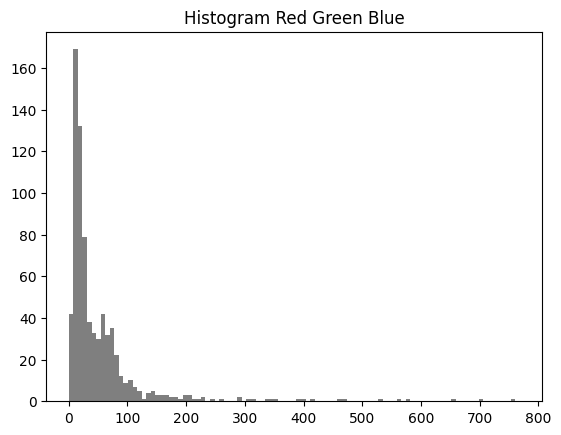

In [11]:
#Menghitung nilai dari gambar
for x in range(0, 256):
    hgr[x] = 0
    hgg[x] = 0
    hgb[x] = 0
    
for x in range(0, 768):
    hgrgb[x] = 0

# th = int(256/64)
temp = [0]
for y in range(0, img.shape[0]):
    for x in range(0, img.shape[1]):
        red = int(img[y][x][0])
        green = int(img[y][x][1])
        blue = int(img[y][x][2])
        green = green + 256
        blue = blue + 512
#         temp.append(green)
        hgrgb[red] += 1
        hgrgb[green] += 1
        hgrgb[blue] += 1

binsrgb = np.linspace(0, 768, 100)
plt.hist(hgrgb, binsrgb, color="black", alpha=0.5)
# plt.plot(hgrgb)
plt.title("Histogram Red Green Blue")
plt.show() #menampilkan histogram RGB

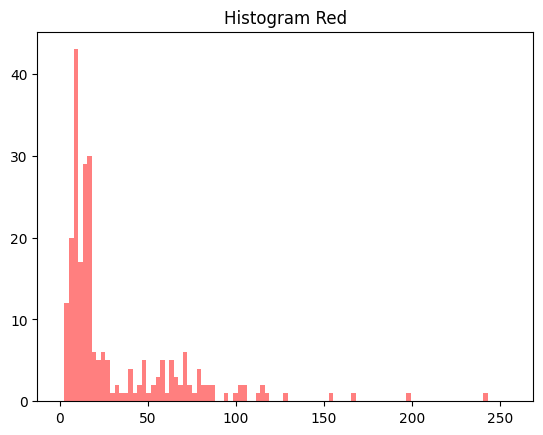

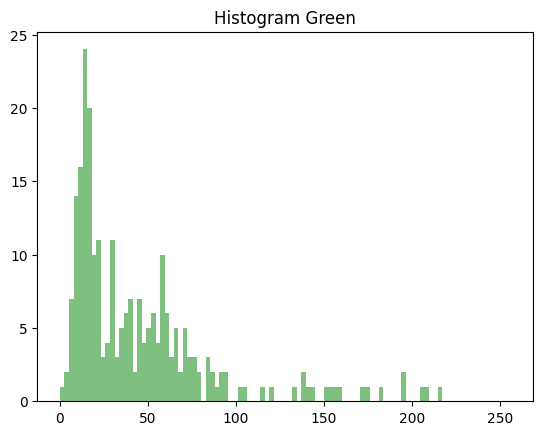

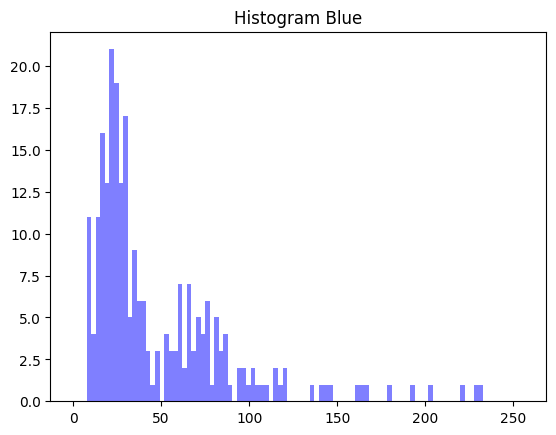

In [12]:
#Menampilkan Histogram
for y in range(0, img_height):
    for x in range(0, img_width):
        red = img[y][x][0]
        green = img[y][x][1]
        blue = img[y][x][2]
        hgr[red] += 1
        hgg[green] += 1
        hgb[blue] += 1

bins = np.linspace(0, 256, 100)
plt.hist(hgr, bins, color="red", alpha=0.5)
plt.title("Histogram Red")
plt.show() #menampilkan histogram red

plt.hist(hgg, bins, color="green", alpha=0.5)
plt.title("Histogram Green")
plt.show() #menampilkan histogram green

plt.hist(hgb, bins, color="blue", alpha=0.5)
plt.title("Histogram Blue")
plt.show() #menampilkan histogram blue

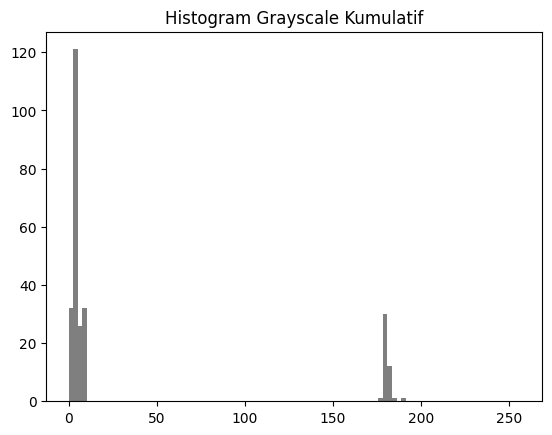

In [13]:
#Menampilkan Histogram Kumulatif
hgk = np.zeros((256))
c = np.zeros((256))

for x in range(0, 256):
    hgk[x] = 0
    c[x] = 0

for y in range(0, img_height):
    for x in range(0, img_width):
        gray = img_grayscale[y][x][0]
        hgk[gray] += 1
                
c[0] = hgk[0]
for x in range(1, 256):
     c[x] = c[x-1] + hgk[x]

hmaxk = c[255]

for x in range(0, 256):
    c[x] = 190 * c[x] / hmaxk

plt.hist(c, bins, color="black", alpha=0.5)
plt.title("Histogram Grayscale Kumulatif")
plt.show() #menampilkan hasil histogram kumulatif

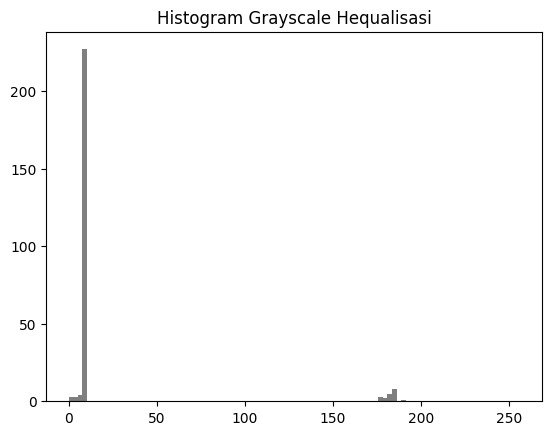

In [15]:
#Menampilkan Histogram Hequalisasi
hgh = np.zeros((256))
h = np.zeros((256))
c = np.zeros((256))

for x in range(0, 256):
    hgh[x] = 0
    h[x] = 0
    c[x] = 0

for y in range(0, img_height):
    for x in range(0, img_width):
        gray = img_grayscale[y][x][0]
        hgh[gray] += 1
                
h[0] = hgh[0]
for x in range(1, 256):
     h[x] = h[x-1] + hgh[x]

for x in range(0, 256):
     h[x] = h[x] / img_height / img_width

for x in range(0, 256):
    hgh[x] = 0
    
for y in range(0, img_height):
    for x in range(0, img_width):
        gray = img_grayscale[y][x][0]
        gray = h[gray] * 255
        hgh[int(gray)] += 1

c[0] = hgh[0]
for x in range(1, 256):
     c[x] = c[x-1] + hgh[x]

hmaxk = c[255]

for x in range(0, 256):
    c[x] = 190 * c[x] / hmaxk

plt.hist(c, bins, color="black", alpha=0.5)
plt.title("Histogram Grayscale Hequalisasi")
plt.show() #menampilkan hasil histogram hequalisasi